In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [153]:
df = sns.load_dataset('iris')

In [154]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [155]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [156]:
df.duplicated().sum()

np.int64(1)

In [157]:
df.drop_duplicates()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [158]:
df.duplicated().sum()

np.int64(1)

In [159]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [161]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [162]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [163]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [164]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [165]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [166]:
ddf = df.drop(columns=('species'))

In [167]:
ddf.head(1)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2


In [168]:
df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [170]:
speciesnum = df['species'].replace({'setosa': 0, 'versicolor': 1, 'virginica': 2},inplace=True,)

In [171]:
df['species'].unique()

array([0, 1, 2])

sepal_length


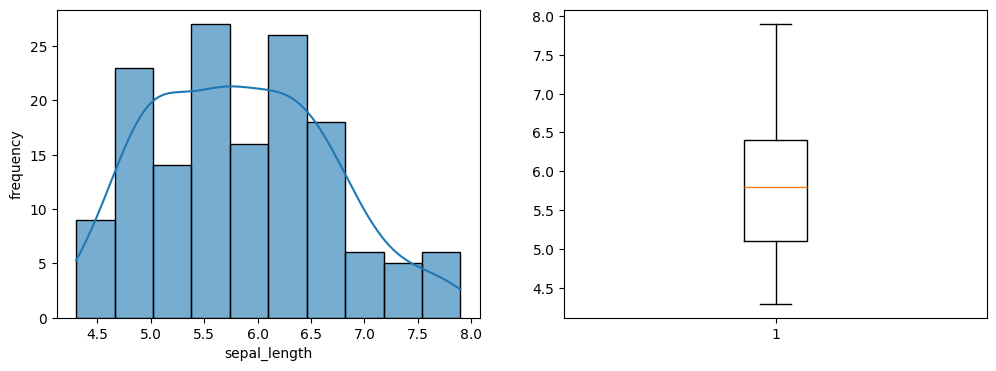

sepal_width


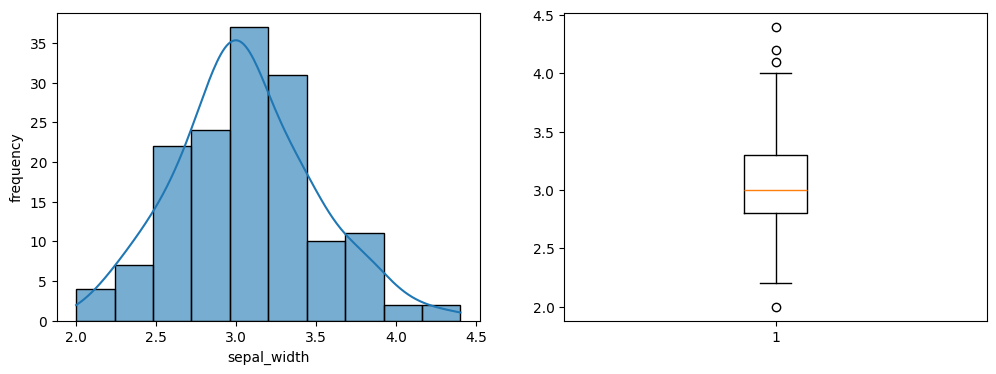

petal_length


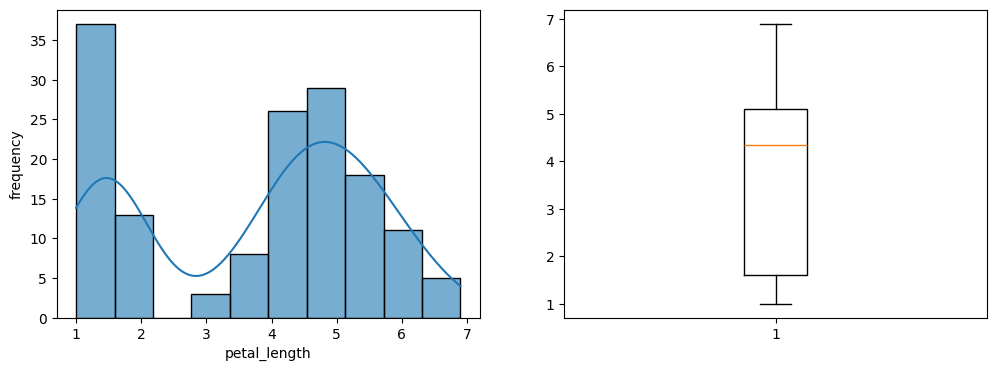

petal_width


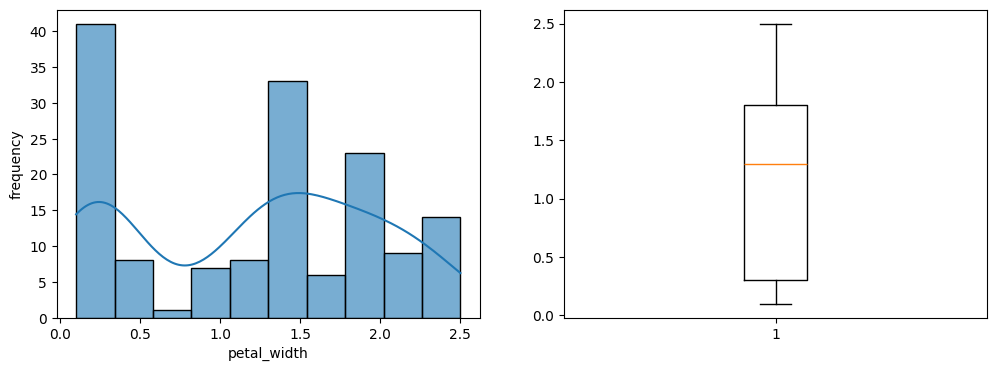

species


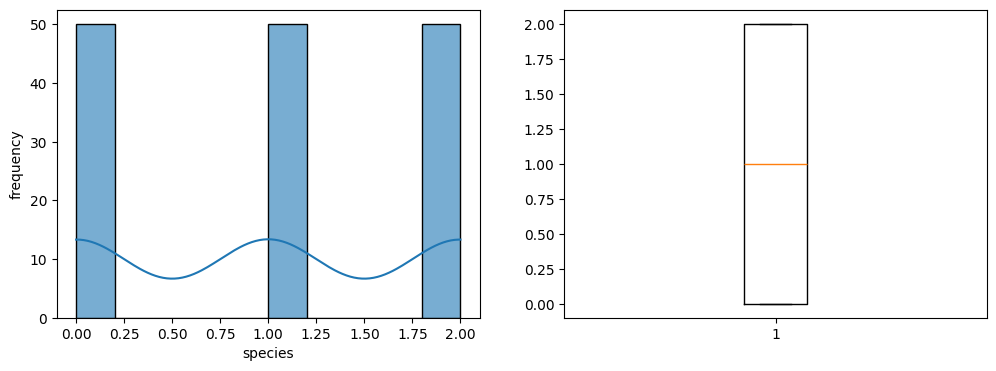

In [173]:
for col in df.columns:
    print(col)
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col],kde=True,bins=10,alpha=0.6)
    plt.ylabel('frequency')
    plt.subplot(1,2,2)
    plt.boxplot(df[col])
    plt.show()

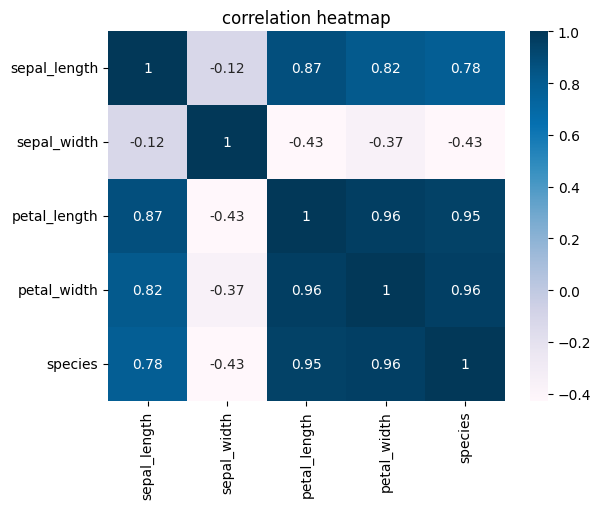

In [176]:
corr = df.corr(method='pearson')
sns.heatmap(corr,annot=True,cmap='PuBu')
plt.title('correlation heatmap')
plt.show()

In [ ]:
X = df.drop(columns=['species'])
y = df['species']

In [178]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [179]:
x_test.shape

(30, 4)

In [180]:
scalar = StandardScaler()
x_train_scalar = scalar.fit_transform(x_train)
x_test_scalar = scalar.fit_transform(x_test)

In [181]:
a = np.sqrt(150)
a

np.float64(12.24744871391589)

In [182]:
knn = KNeighborsClassifier(n_neighbors=12)

In [183]:
knn.fit(x_train_scalar,y_train)

KNeighborsClassifier(n_neighbors=12)

In [184]:
y_pred= knn.predict(x_test_scalar)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0])

In [186]:
accuracy = accuracy_score(y_pred,y_test)*100
accuracy

96.66666666666667

In [197]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [198]:
new_data = [[4.3,3.1,4.7,1.3]]
y_pred = knn.predict(new_data)
y_pred

array([2])